<a href="https://colab.research.google.com/github/ZaazMarx1104/Churn-Rate-Prediction-Kaggle/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import keras

In [149]:
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [150]:
df.shape

(7043, 21)

In [151]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [152]:
df['customerID'].duplicated().sum()

0

In [153]:
df_for_corr = df.drop(columns=['customerID'])

In [154]:
df_for_corr['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [155]:
df_for_corr['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [156]:
df_for_corr['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [157]:
df_for_corr['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [158]:
df_for_corr['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [159]:
df_for_corr['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [160]:
df_for_corr['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [161]:
df_for_corr['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [162]:
df_for_corr['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [163]:
df_for_corr['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [164]:
df_for_corr['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [165]:
df_for_corr['Churn'].unique()

array(['No', 'Yes'], dtype=object)

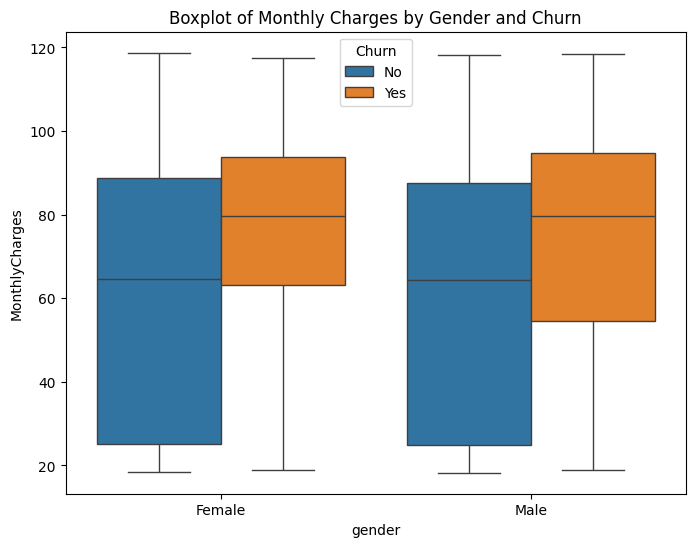

In [166]:
# prompt: draw a boxplot between gender and churn

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Boxplot of Monthly Charges by Gender and Churn')
plt.show()


In [167]:
df_for_corr['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [168]:
print(100*1869/(1869+5174))

26.536987079369588


In [169]:
df_for_corr['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [170]:
df_for_corr['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [171]:
df_with_churn = df_for_corr[df_for_corr['Churn'] == 'Yes']

In [172]:
df_without_churn = df_for_corr[df_for_corr['Churn'] == 'No']

In [173]:
df_with_churn['MonthlyCharges'].mean()

74.44133226324237

In [174]:
df_without_churn['MonthlyCharges'].mean()

61.26512369540008

We can quite clearly see that the people who churn out have a higher than average mean monthly charge

In [175]:
df_with_churn['MonthlyCharges'].describe()

,MonthlyCharges
count,1869.000000
mean,74.441332
std,24.666053
min,18.850000
25%,56.150000
50%,79.650000
75%,94.200000
max,118.350000


In [176]:
df_without_churn['MonthlyCharges'].describe()

,MonthlyCharges
count,5174.000000
mean,61.265124
std,31.092648
min,18.250000
25%,25.100000
50%,64.425000
75%,88.400000
max,118.750000


In [177]:
df_for_corr['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [178]:
df_with_churn['Contract'].value_counts()


,count
Contract,
Month-to-month,1655
One year,166
Two year,48


In [179]:
df_without_churn['Contract'].value_counts()

,count
Contract,
Month-to-month,2220
Two year,1647
One year,1307


In [180]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df['Contract'] = ordinal_encoder.fit_transform(df[['Contract']])
df['Contract'] = df['Contract'].astype(int)

In [181]:
df['Contract'].value_counts()

,count
Contract,
0,3875
2,1695
1,1473


In [182]:
df['Churn'] = ordinal_encoder.fit_transform(df[['Churn']])
df['Churn'] = df['Churn'].astype(int)

In [183]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [184]:
df['Dependents']=ordinal_encoder.fit_transform(df[['Dependents']])
df['Dependents'] = df['Dependents'].astype(int)

In [185]:
df['Dependents'].value_counts()

,count
Dependents,
0,4933
1,2110


In [186]:
df.shape

(7043, 21)

In [187]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
df_payment_method = onehot_encoder.fit_transform(df[['PaymentMethod']])
df_payment_method = pd.DataFrame(df_payment_method, columns=onehot_encoder.get_feature_names_out(['PaymentMethod']))

In [188]:
df_payment_method.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [189]:
df = pd.concat([df, df_payment_method], axis=1)
df.drop(columns=['PaymentMethod'], inplace=True)

In [190]:
df['InternetService']=ordinal_encoder.fit_transform(df[['InternetService']])
df['InternetService'] = df['InternetService'].astype(int)

In [191]:
df['InternetService'].value_counts()

,count
InternetService,
1,3096
0,2421
2,1526


In [192]:
df['Partner']=ordinal_encoder.fit_transform(df[['Partner']])
df['Partner'] = df['Partner'].astype(int)
df['Partner'].value_counts()

,count
Partner,
0,3641
1,3402


In [193]:
df['PhoneService']=ordinal_encoder.fit_transform(df[['PhoneService']])
df['PhoneService'] = df['PhoneService'].astype(int)
df['PhoneService'].value_counts()

,count
PhoneService,
1,6361
0,682


In [194]:
df['gender']=ordinal_encoder.fit_transform(df[['gender']])
df['gender'] = df['gender'].astype(int)
df['gender'].value_counts()

,count
gender,
1,3555
0,3488


In [195]:
df['MultipleLines']=ordinal_encoder.fit_transform(df[['MultipleLines']])
df['MultipleLines'] = df['MultipleLines'].astype(int)
df['MultipleLines'].value_counts()

,count
MultipleLines,
0,3390
2,2971
1,682


In [196]:
df['Dependents']=ordinal_encoder.fit_transform(df[['Dependents']])
df['Dependents'] = df['Dependents'].astype(int)
df['Dependents'].value_counts()

,count
Dependents,
0,4933
1,2110


In [197]:
df['OnlineSecurity']=ordinal_encoder.fit_transform(df[['OnlineSecurity']])
df['OnlineSecurity'] = df['OnlineSecurity'].astype(int)
df['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
0,3498
2,2019
1,1526


In [198]:
df['StreamingTV']=ordinal_encoder.fit_transform(df[['StreamingTV']])
df['StreamingTV'] = df['StreamingTV'].astype(int)
df['StreamingTV'].value_counts()

,count
StreamingTV,
0,2810
2,2707
1,1526


In [199]:
df['StreamingMovies']=ordinal_encoder.fit_transform(df[['StreamingMovies']])
df['StreamingMovies'] = df['StreamingMovies'].astype(int)
df['StreamingMovies'].value_counts()

,count
StreamingMovies,
0,2785
2,2732
1,1526


In [200]:
df['PaperlessBilling']=ordinal_encoder.fit_transform(df[['PaperlessBilling']])
df['PaperlessBilling'] = df['PaperlessBilling'].astype(int)
df['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
1,4171
0,2872


In [201]:
df['OnlineBackup']=ordinal_encoder.fit_transform(df[['OnlineBackup']])
df['OnlineBackup'] = df['OnlineBackup'].astype(int)
df['OnlineBackup'].value_counts()

,count
OnlineBackup,
0,3088
2,2429
1,1526


In [202]:
print(df.select_dtypes(include=['object']).columns)

Index(['customerID', 'DeviceProtection', 'TechSupport', 'TotalCharges'], dtype='object')


In [203]:
df['DeviceProtection']=ordinal_encoder.fit_transform(df[['DeviceProtection']])
df['DeviceProtection'] = df['DeviceProtection'].astype(int)
df['DeviceProtection'].value_counts()

,count
DeviceProtection,
0,3095
2,2422
1,1526


In [204]:
df['TechSupport']=ordinal_encoder.fit_transform(df[['TechSupport']])
df['TechSupport'] = df['TechSupport'].astype(int)
df['TechSupport'].value_counts()

,count
TechSupport,
0,3473
2,2044
1,1526


In [205]:
df = df[~df.applymap(lambda x: isinstance(x, str) and ' ' in x).any(axis=1)]

<ipython-input-205-06d5cd4a305c>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[~df.applymap(lambda x: isinstance(x, str) and ' ' in x).any(axis=1)]


In [206]:
# prompt: import train test split

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'Churn' is your target variable
X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test


In [207]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
random_forest.fit(X_train,y_train)
Predictions = random_forest.predict(X_test)

In [208]:
Predictions = pd.DataFrame(Predictions)
Predictions.value_counts()

,count
0,
0,1139
1,268


In [209]:
y_test.value_counts()

,count
Churn,
0,1033
1,374


In [210]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, Predictions)
f1_score(y_test, Predictions)
print("Accuracy Score: ", accuracy_score(y_test, Predictions))
print("Precision Score: ", precision_score(y_test, Predictions))
print("Recall Score: ", recall_score(y_test, Predictions))
print("F1 Score: ", f1_score(y_test, Predictions))

Accuracy Score:  0.7896233120113717
Precision Score:  0.6455223880597015
Recall Score:  0.4625668449197861
F1 Score:  0.5389408099688473


In [211]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [10, 20, None],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring="precision",
    cv=5
)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

In [212]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=20, n_estimators=500,
                       random_state=42)

In [213]:
best_rf_predictions = best_rf.predict(X_test)

In [214]:
best_rf_predictions = pd.DataFrame(best_rf_predictions)
best_rf_predictions.value_counts()

,count
0,
0,1141
1,266


In [215]:
best_rf.feature_importances_

array([0.01209214, 0.01708825, 0.01193561, 0.01284202, 0.15525541,
       0.00472346, 0.01697345, 0.04497888, 0.07440854, 0.02599606,
       0.01931952, 0.06696036, 0.01375843, 0.01479572, 0.14485032,
       0.01896016, 0.12845941, 0.14364172, 0.00743619, 0.00919153,
       0.04787722, 0.00845561])

In [216]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, best_rf_predictions)
f1_score(y_test, best_rf_predictions)
print("Accuracy Score: ", accuracy_score(y_test, best_rf_predictions))
print("Precision Score: ", precision_score(y_test, best_rf_predictions))
print("Recall Score: ", recall_score(y_test, best_rf_predictions))
print("F1 Score: ", f1_score(y_test, best_rf_predictions))

Accuracy Score:  0.7967306325515281
Precision Score:  0.6654135338345865
Recall Score:  0.4732620320855615
F1 Score:  0.553125
